In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

car = pd.read_csv('data/CarPrice_Assignment.csv')
car.head(10)

# 타겟값 : price

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
print('데이터 세트의 Shape:', car.shape)
print('\n전체 feature 들의 type \n',car.dtypes.value_counts())

# Null 컬럼 확인 : Null이 있는 컬럼그 그 건수를 내림차순으로 출력
isnull_series = car.isnull().sum()
print('\nNull 컬럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))

데이터 세트의 Shape: (205, 26)

전체 feature 들의 type 
 object     10
float64     8
int64       8
dtype: int64

Null 컬럼과 그 건수:
  Series([], dtype: int64)


<AxesSubplot:title={'center':'Original Sale Price Histogram'}, xlabel='price', ylabel='Density'>

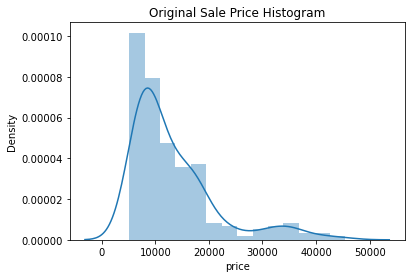

In [9]:
plt.title('Original Sale Price Histogram')
sns.distplot(car['price'])

<AxesSubplot:title={'center':'Log Transformed Sale Price Histogram'}, xlabel='price', ylabel='Density'>

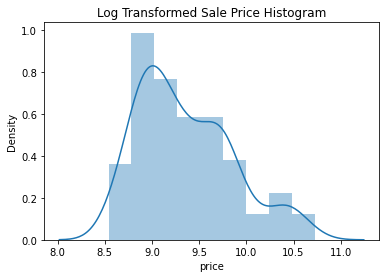

In [10]:
# 결과값을 로그 변환하고 다시 분포도 확인
plt.title('Log Transformed Sale Price Histogram')
log_carprice = np.log1p(car['price'])
sns.distplot(log_carprice)

In [12]:
# SalePrice 로그 변환
original_CarPrice = car['price'] # 원래값 저장
car['price'] = np.log1p(car['price']) # 로그변환 값으로 타겟값을 대체

In [13]:
# 카테고리값들 원핫으로 대체
print('get_dummies() 수행 전 데이터 Shape:', car.shape)
car_ohe = pd.get_dummies(car)
print('get_dummies() 수행 후 데이터 Shape:', car_ohe.shape)

get_dummies() 수행 전 데이터 Shape: (205, 26)
get_dummies() 수행 후 데이터 Shape: (205, 201)


In [14]:
# 단일 모델의 RMSE 값 반환
def get_rmse(model): # 학습된 모델을 받아서 예측
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

# 여러 모델의 RMSE 값 반환
def get_rmses(models) :
    rmses = []
    for model in models :
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses    

In [15]:
## 데이터 분할
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 타깃과 피처
y_target = car_ohe['price']
X_features = car_ohe.drop('price',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

In [16]:
# 일반 선형 회귀
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

# 릿지 회귀
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

# 라쏘 회귀
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

Lasso()

In [17]:
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models) # 학습된 모델 전달하고
# rmse값 반환

LinearRegression 로그 변환된 RMSE: 1.387
Ridge 로그 변환된 RMSE: 0.151
Lasso 로그 변환된 RMSE: 0.211


[1.3866573139873892, 0.1514418698059446, 0.21112866351509083]

In [18]:
def get_top_bottom_coef(model) :
    coef = pd.Series(model.coef_, index=X_features.columns)
    
    coef_high = coef.sort_values(ascending = False).head(10)
    coef_low = coef.sort_values(ascending = False).tail(10)
    
    return coef_high, coef_low

In [19]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__ +' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120) # 안쪽, 패딩값
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

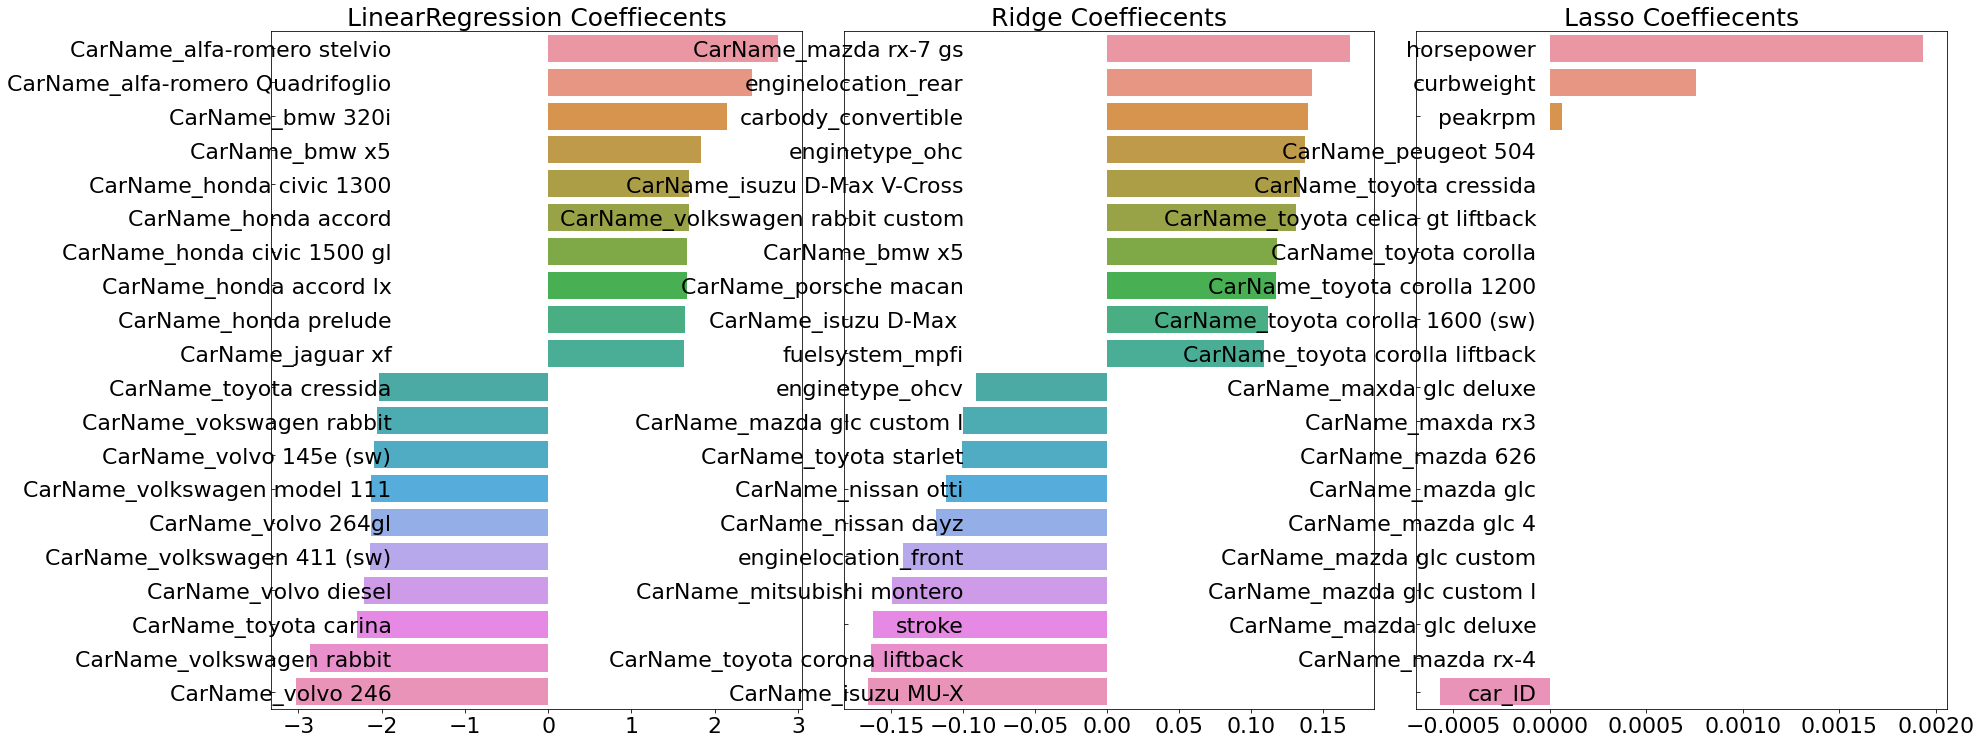

In [20]:
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [21]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models) :
    
    for model in models :
    
        # 분할하지 않고 전체 데이터 세트로 교차검증 수행
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring = 'neg_mean_squared_error', cv=5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

In [22]:
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [1.626 0.815 0.621 0.8   2.632]
LinearRegression CV 평균 RMSE 값: 1.299

Ridge CV RMSE 값 리스트: [0.203 0.197 0.189 0.22  0.204]
Ridge CV 평균 RMSE 값: 0.203

Lasso CV RMSE 값 리스트: [0.243 0.192 0.223 0.302 0.168]
Lasso CV 평균 RMSE 값: 0.226


In [23]:
from sklearn.model_selection import GridSearchCV
# 모델과 하이퍼 파라미터 딕셔너리 객체를 받아서
# 최적화 작업의 결과를 표시하는 함수
# 릿지 모델과 라쏘 모델의 최적화 alpha 값 추출
def get_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_ # 최적 파라미터로 재학습된 모델 반환

In [24]:
ridge_params = {'alpha' : [0.05,0.1,1,5,8,10,12,15,20]}
lasso_params = {'alpha' : [0.001,0.005,0.008,0.05,0.03,0.1,0.5,1.5,10]}

In [25]:
best_ridge = get_best_params(ridge_reg, ridge_params)
best_lasso = get_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1959, 최적 alpha:{'alpha': 15}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.2106, 최적 alpha:{'alpha': 0.005}


In [26]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha = 15)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha = 0.005)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.005)

In [27]:
# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 1.387
Ridge 로그 변환된 RMSE: 0.176
Lasso 로그 변환된 RMSE: 0.205


[1.3866573139873892, 0.1760791786547056, 0.20536741113800583]

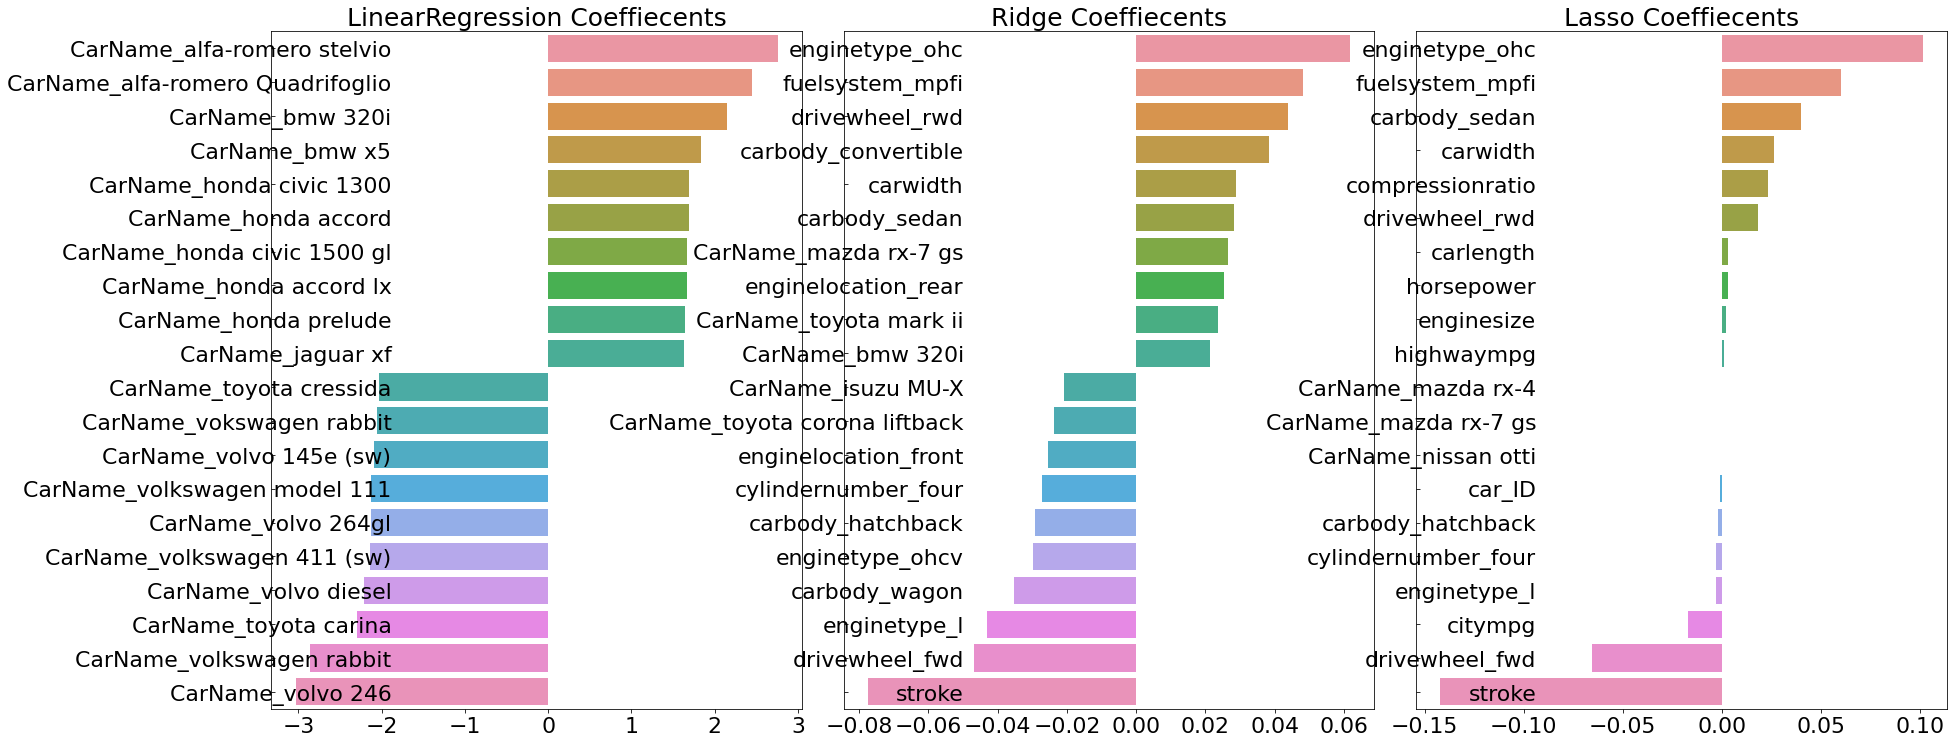

In [28]:
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)